# Analisis sobre los hechos y victimas en CABA


In [36]:
#Importo las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from folium import plugins
from folium.plugins import HeatMap

In [37]:
#Importo las tablas con las que se realizaran los analis
homicidios = pd.read_excel("homicidios.xlsx",sheet_name="HECHOS", decimal=',')
victimas = pd.read_excel("homicidios.xlsx",sheet_name="VICTIMAS", decimal=',')

## Hechos

Se muestran los primeros 2 valores para tomar como ejemplificacion de los demas valores en la tabla

In [38]:
homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [39]:
print("\nInformacion del df")
print(homicidios.info())


Informacion del df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    objec

In [40]:
print("\nDescribo al df")
print(homicidios.describe())
print("\nLa forma que tiene el df es:")
print(homicidios.shape)



Describo al df
       N_VICTIMAS                          FECHA         AAAA          MM  \
count  696.000000                            696   696.000000  696.000000   
mean     1.030172  2018-09-14 05:12:24.827586048  2018.188218    6.692529   
min      1.000000            2016-01-01 00:00:00  2016.000000    1.000000   
25%      1.000000            2017-04-02 12:00:00  2017.000000    4.000000   
50%      1.000000            2018-07-12 12:00:00  2018.000000    7.000000   
75%      1.000000            2020-01-04 06:00:00  2020.000000   10.000000   
max      3.000000            2021-12-30 00:00:00  2021.000000   12.000000   
std      0.179393                            NaN     1.683754    3.571309   

               DD        Altura      COMUNA  
count  696.000000    129.000000  696.000000  
mean    15.936782   3336.635659    7.425287  
min      1.000000     30.000000    0.000000  
25%      9.000000   1359.000000    4.000000  
50%     16.000000   2551.000000    8.000000  
75%     23.000

In [41]:
print(f"La cantidad de datos nulos es: {homicidios.isna().sum()}")

La cantidad de datos nulos es: ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


Se puede observa que los valores nulos dentro de la tabla se encuentran en las columnas de Altura y Cruce, pero al ser columnas de poco interes para este analisis se pueden dejar ya que no afectan al resultado final

d:\EntornosVirtuales\Proyectosolohenry\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EntornosVirtuales\Proyectosolohenry\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EntornosVirtuales\Proyectosolohenry\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EntornosVirtuales\Proyectosolohenry\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

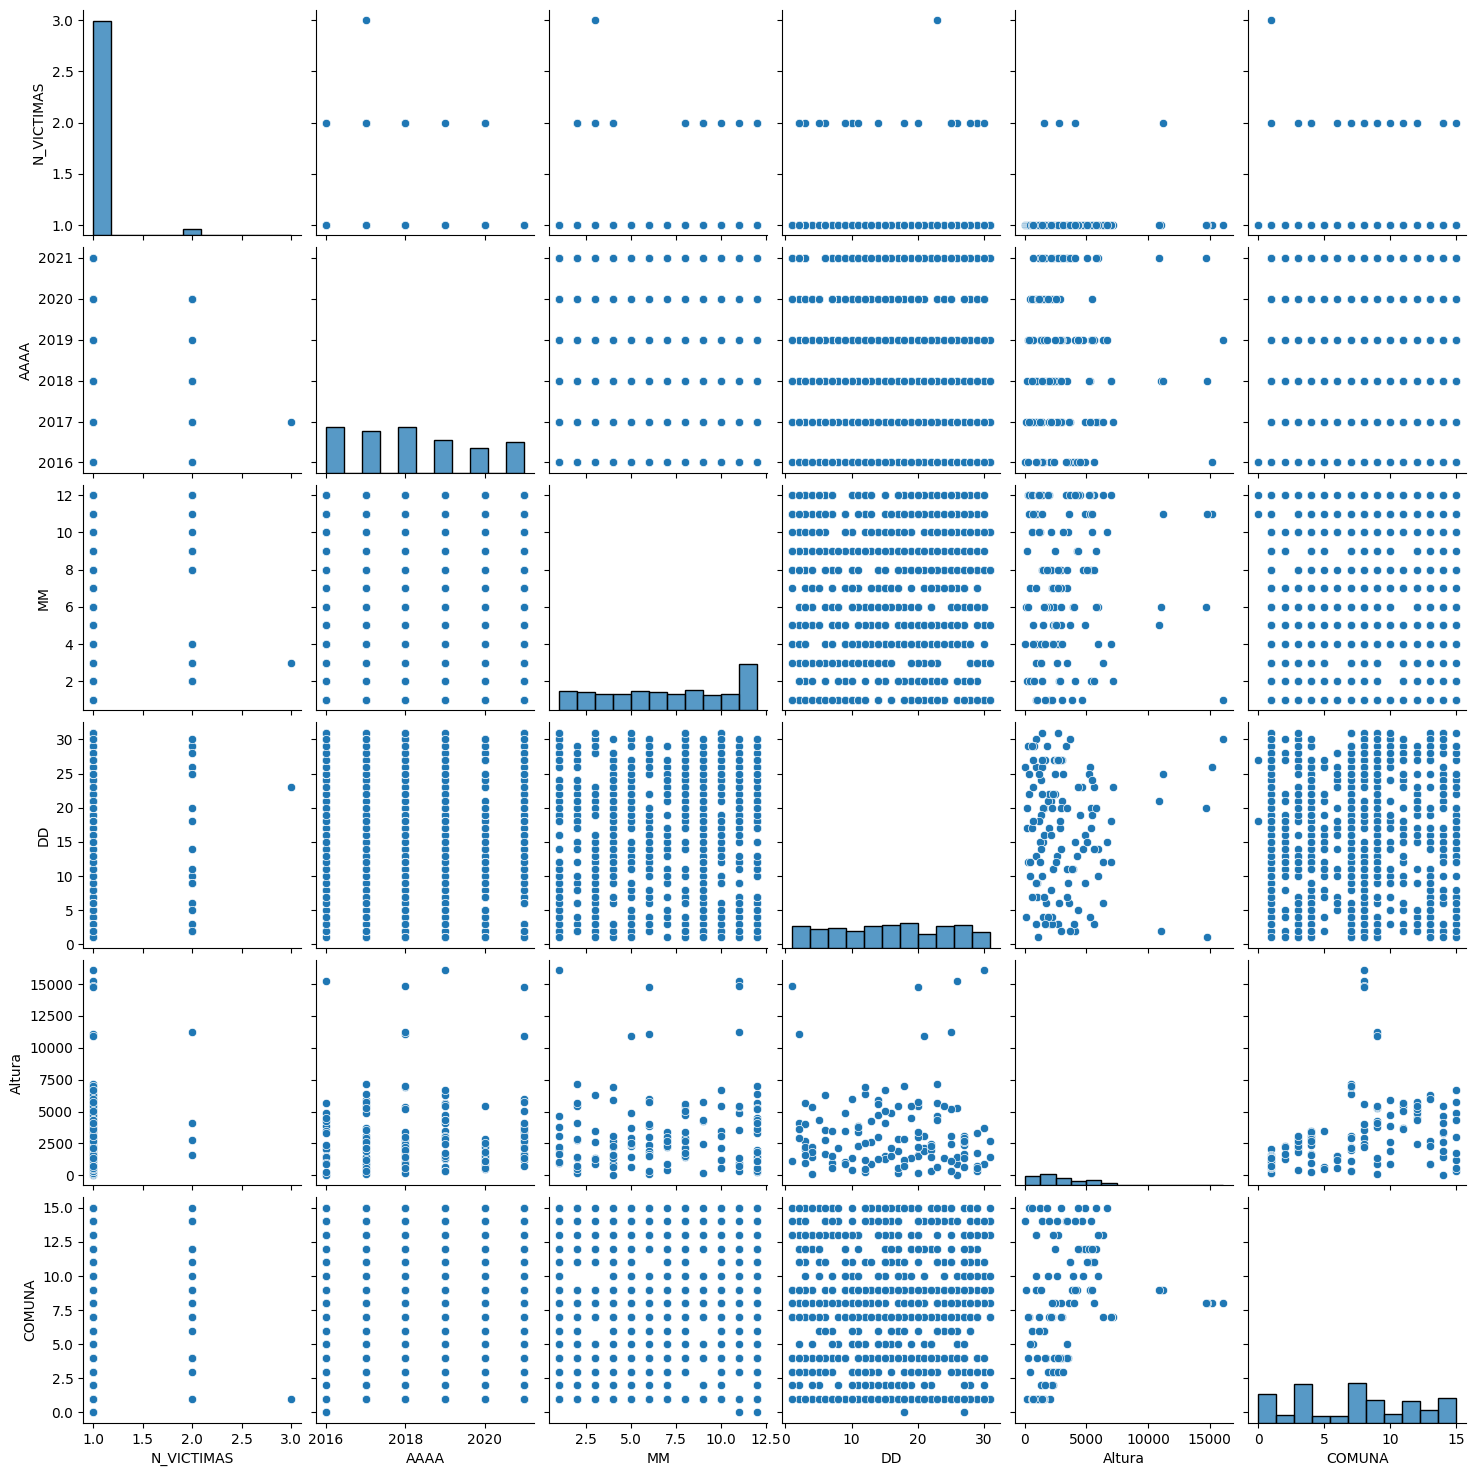

In [42]:
sns.pairplot(homicidios)
plt.show()

Se genera un grafico de correlacion, se observa que al parecer no hay correlacion entre la cantidad de victimas por año o mes en particular, se puede sacar en particular que la mayor parte de los accidentes se encuentran mas cerca del centro

C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\658930544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HORA"][i] = hora
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\658930544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HORA"][i] = hora
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\658930544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HORA"][i] = hora
C:\Users\mateo\AppData\Local\Temp\ipy

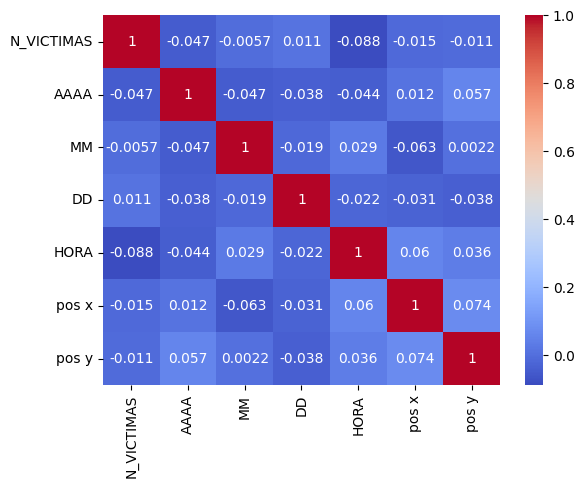

In [43]:
data = homicidios[['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HORA','pos x', 'pos y']]
for i in range(len(data)):
    try:
        hora = data["HORA"][i]
        hora = hora.hour
        data["HORA"][i] = hora
    except:
        hora = data["HORA"][i]
        hora =  hora[:2].replace(".","")
        data["HORA"][i] = hora
        
data = data[data != "SD"]
data = data[data != "."]

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Se genera una matriz de calor para observar si las victimas pueden ser realcionas con algun momento especifico o pocicion en particular, pero no se llego a nada concluyente

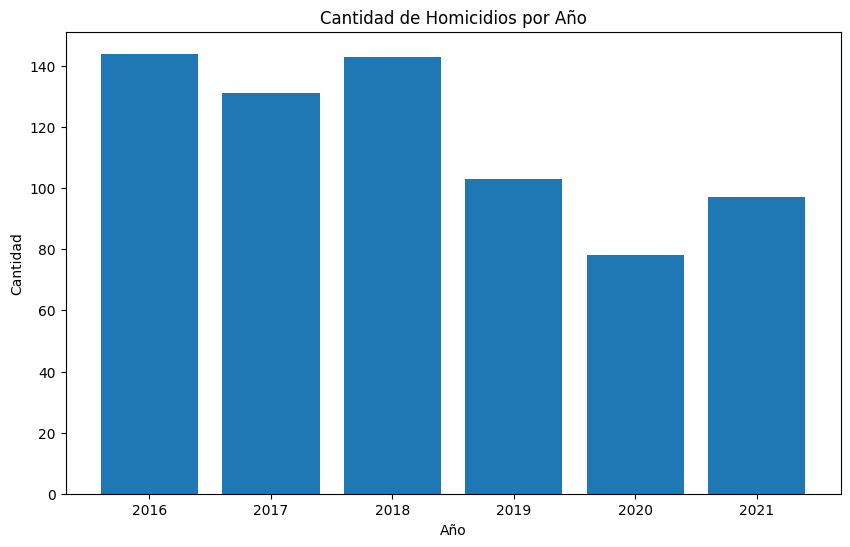

In [44]:
#Homicidos por año
conteo_anios = homicidios['AAAA'].value_counts().sort_index()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_anios.index, conteo_anios.values)
# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de Homicidios por Año')
# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'Cantidad de Homicidios por mes')

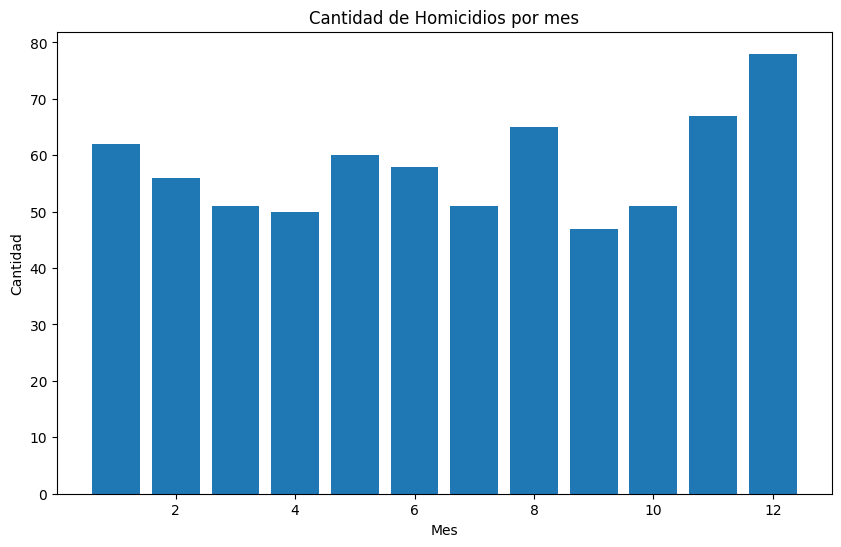

In [45]:
#Homicidios por mes
conteo_mes = homicidios['MM'].value_counts().sort_index()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_mes.index, conteo_mes.values)
# Agregar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de Homicidios por mes')

Text(0.5, 1.0, 'Cantidad de Homicidios por hora')

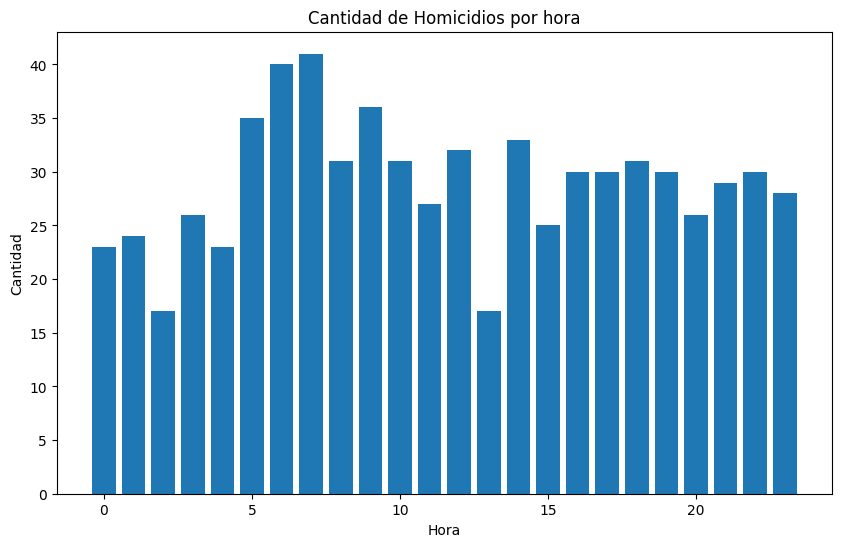

In [46]:
#Homicidios por mes
datos = homicidios[homicidios != "SD"]
conteo_mes = datos['HH'].value_counts().sort_index()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_mes.index, conteo_mes.values)
# Agregar etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Cantidad de Homicidios por hora')

Se generaron 3 graficos de barras que muestran las cantidad de victimas por año,mes y por hora.

Por año se observa un disminucion de victimas hasta el 2020 pero en el 2021 se genero un aumento de esto.
por mes se observa que aumenta la cantidad de victimas en el mes 12, una posible causa pueden ser ya que se encuentran las fechas festivas.
por hora se ve que durante las horas de entre las 5am y 8am se encuentra que son los horarios con mas victimas siendo estos los horarios donde las personas se encuentran trasladandoce a su trabajo

In [47]:
pos_x = []
pos_y = []
for i in range(len(homicidios)):
    try:
        numerox = float(homicidios["pos x"][i])
        pos_x.append(numerox)
        numeroy = float(homicidios["pos y"][i])
        pos_y.append(numeroy)
    except:
        pass



distritos = list(zip(pos_y, pos_x))

# Filtra los valores "." de la lista de listas
distritos = [coord for coord in distritos if "." not in coord]

In [48]:
mapa = folium.Map(location=[-34.6037,-58.3816],zoom_start=12)
mapa

In [49]:
HeatMap(distritos,radius = 15,max_val = 0.1,min_opacity=0.4).add_to(mapa)
mapa

C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\2855300307.py:1: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(distritos,radius = 15,max_val = 0.1,min_opacity=0.4).add_to(mapa)


A partir de este mapa se encuentran los puntos mas criticos en cantidad de victimas, se nota en particular que la zona de constitucion es la zona mas afectada por este problema

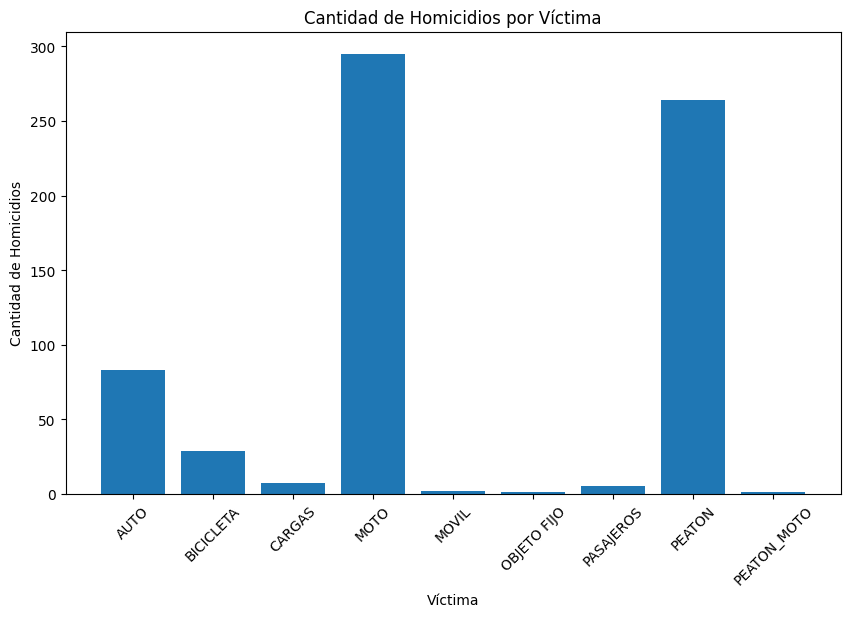

In [50]:
conteo_victima = homicidios['VICTIMA'][homicidios["VICTIMA"] != "SD"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_victima.index, conteo_victima.values)

# Rotar las etiquetas del eje x para una mejor legibilidad (opcional)
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Homicidios')
plt.title('Cantidad de Homicidios por Víctima')

# Mostrar el gráfico
plt.show()

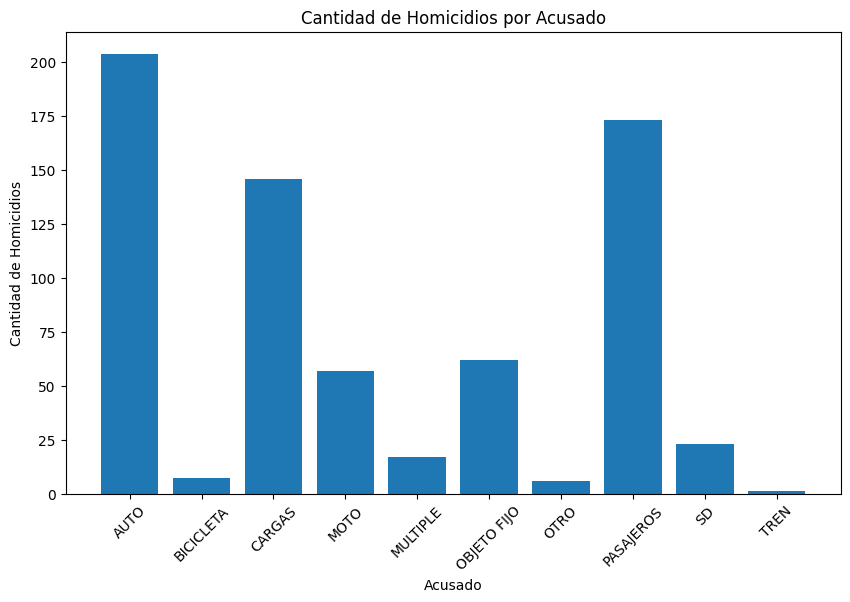

In [51]:
conteo_victima = homicidios['ACUSADO'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_victima.index, conteo_victima.values)

# Rotar las etiquetas del eje x para una mejor legibilidad (opcional)
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Homicidios')
plt.title('Cantidad de Homicidios por Acusado')

# Mostrar el gráfico
plt.show()

Se generan 2 graficos para observar la dispocicion de victimas y acusados, observar que la mayor cantidad de victimas son motos y peatones, mientras que el acusado son en su mayotia autos y pasajeros 

## Victimas


In [52]:
victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


In [53]:
print("\nInformacion del df")
print(victimas.info())


Informacion del df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB
None


In [54]:
print("\nDescribo al df")
print(victimas.describe())
print("\nLa forma que tiene el df es:")
print(victimas.shape)



Describo al df
                               FECHA         AAAA          MM          DD
count                            717   717.000000  717.000000  717.000000
mean   2018-09-09 01:36:24.100418304  2018.174338    6.688982   15.960948
min              2016-01-01 00:00:00  2016.000000    1.000000    1.000000
25%              2017-04-01 00:00:00  2017.000000    4.000000    9.000000
50%              2018-07-07 00:00:00  2018.000000    7.000000   16.000000
75%              2019-12-18 00:00:00  2019.000000   10.000000   23.000000
max              2021-12-30 00:00:00  2021.000000   12.000000   31.000000
std                              NaN     1.672655    3.575140    8.683358

La forma que tiene el df es:
(717, 10)


In [55]:
print(f"La cantidad de datos nulos es: {victimas.isna().sum()}")

La cantidad de datos nulos es: ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64


C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Lo

C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Local\Temp\ipykernel_7240\520586150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victimas["EDAD"][i] = edad
C:\Users\mateo\AppData\Lo

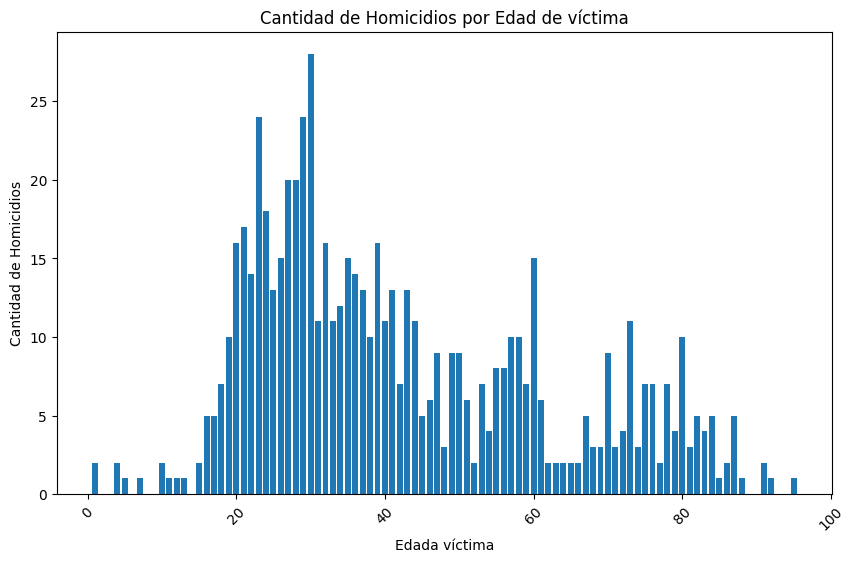

In [56]:
for i in range(len(victimas)):
    edad = victimas["EDAD"][i]
    if edad != "SD":
        edad = int(edad)
        victimas["EDAD"][i] = edad
    else:
        edad = 0
        victimas["EDAD"][i] = edad

conteo_victima = victimas['EDAD'][victimas["EDAD"] != 0].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
plt.bar(conteo_victima.index, conteo_victima.values)

# Rotar las etiquetas del eje x para una mejor legibilidad (opcional)
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Edada víctima')
plt.ylabel('Cantidad de Homicidios')
plt.title('Cantidad de Homicidios por Edad de víctima')

# Mostrar el gráfico
plt.show()

Se genera un grafico de barras por cantidad de victimas y su eda, se puede observar que la mayoria se encuentraentre los 23 y 30 años, tambien como punto particular a los 60 años se encuentra un aumento de victimas

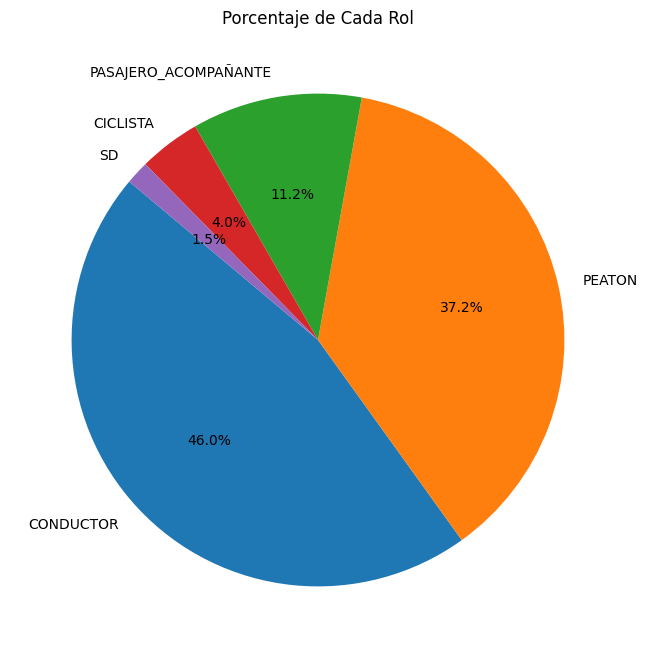

In [57]:
porcentaje_rol = victimas['ROL'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Opcional: ajusta el tamaño del gráfico
plt.pie(porcentaje_rol, labels=porcentaje_rol.index, autopct='%1.1f%%', startangle=140)

# Agregar título
plt.title('Porcentaje de Cada Rol')

# Mostrar el gráfico
plt.show()

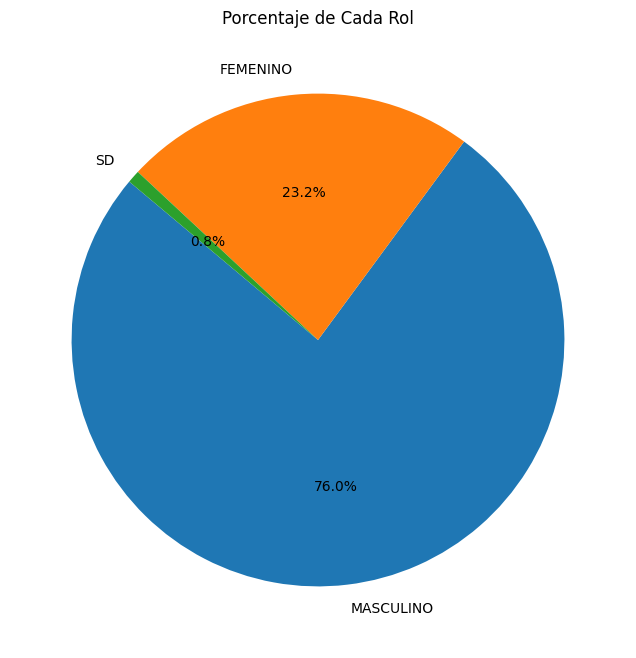

In [58]:
porcentaje_rol = victimas['SEXO'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Opcional: ajusta el tamaño del gráfico
plt.pie(porcentaje_rol, labels=porcentaje_rol.index, autopct='%1.1f%%', startangle=140)

# Agregar título
plt.title('Porcentaje de Cada Rol')

# Mostrar el gráfico
plt.show()

Los 2 graficos anteriores de cantidad de victimas por rol y de cantida de victimas por genero, en particular se observa que la mayor cantidad de victimas se encuentran los conductores, y sobre los generos se ve que los masculinos son la mayoria de las victimas